In [12]:
theta_size = [1, 10, 100] # xlabel
res = {
    '30b':
    {
        'acc': [72.05, 73.02, 73.04],
        'thr': [6.23, 5.5346, 4.8267]
    },
    '66b':
    {
        'acc': [74.19, 73.89, 74.86],
        'thr': [12.94, 11.898553, 10.772130]
    }
}


In [13]:
import matplotlib.pyplot as plt

def plot_theta_ablation(theta_size, res):
    # Plot the line graph
    fig, ax1 = plt.subplots()

    # Set the first y-axis (accuracy) and plot the line
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Accuracy')
    ax1.plot(theta_size, res['30b']['acc'], 'b-', label='30b Acc')
    ax1.plot(theta_size, res['66b']['acc'], 'r-', label='66b Acc')
    ax1.set_xscale('log')
    ax1.set_xticks(theta_size)
    ax1.set_xticklabels(theta_size)
    ax1.tick_params(axis='y')
    ax1.grid(True, linestyle='--', linewidth=0.5)

    # Set the second y-axis (throughput) and plot the line
    ax2 = ax1.twinx()
    ax2.set_ylabel('Throughput')
    ax2.plot(theta_size, res['30b']['thr'], 'b--', label='30b Thr')
    ax2.plot(theta_size, res['66b']['thr'], 'r--', label='66b Thr')
    ax2.set_xscale('log')
    ax2.set_xticks(theta_size)
    ax2.set_xticklabels(theta_size)
    ax2.tick_params(axis='y')
    ax2.grid(True, linestyle='--', linewidth=0.5)

    # Add legends
    lns1, labs1 = ax1.get_legend_handles_labels()
    lns2, labs2 = ax2.get_legend_handles_labels()
    ax2.legend(lns1+lns2, labs1+labs2, loc='best')

    plt.savefig('theta_ablation.pdf')
    plt.show()

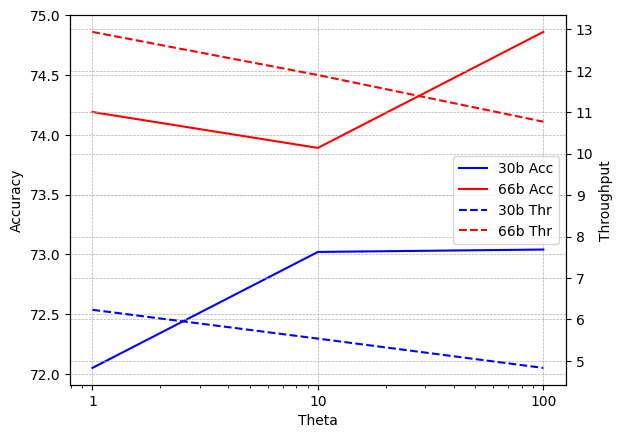

In [14]:
plot_theta_ablation(theta_size, res)

In [5]:
gamma_size = [0.6, 0.8, 1] # xlabel
res = {
    '30b':
    {
        'pipeedge': [20.746677, 22.07, 23.130831],
        'adaqpipe': [4.590317, 6.01, 7.276429]
    },
    '66b':
    {
        'pipeedge': [37.407494, 39.24, 40.708042],
        'adaqpipe': [41.093355, 6.01, 45.334859]
    }
}

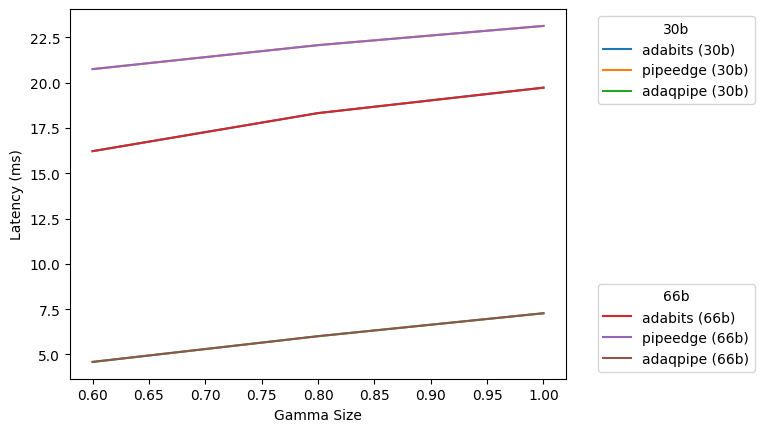

In [9]:
# Plotting
fig, ax = plt.subplots()

# Set X axis label
ax.set_xlabel('Gamma Size')

# Set Y axis label
ax.set_ylabel('Latency (ms)')

# Plot data for each algorithm and case
for case, data in res.items():
    for key, value in data.items():
        label = f'{key} ({case})'
        ax.plot(gamma_size, value, label=label)

# Add legends
handles, labels = ax.get_legend_handles_labels()
leg1 = ax.legend(handles[:3], labels[:3], title='30b', loc='upper left', bbox_to_anchor=(1.05, 1))
leg2 = ax.legend(handles[3:], labels[3:], title='66b', loc='lower left', bbox_to_anchor=(1.05, 0))
ax.add_artist(leg1)

# Set plot title
# ax.set_title('Latency vs. Gamma Size')

# Show the plot
plt.show()